# Exercício 3

Reproduzir, na ferramenta escolhida, o exemplo histórico da representação gráfica dos dados do caminho seguido pelas tropas de napoleão à Rússia ([link](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march)). Essa visualização foi reproduzida por Wickham como [exemplo para o *ggplot2*](https://rdrr.io/cran/HistData/man/Minard.html).

Os dados para implementação estão disponíveis no seguinte [link](https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/minard.txt).

-----
## Resposta:

A ferramenta gráfica escolhida por mim foi o [Altair](https://altair-viz.github.io/). 

**OBS:** Como o dataset não é muito grande, optei por salvá-lo manualmente em 3 arquivos .txt:
> **`cities.txt`**: contém dados de Latitude e Longidude das cidades visitadas pelas tropas de Napoleão.      <br>
> **`temperature.txt`**: contém informações de temperatura em determinadas datas.                             <br>
> **`troops.txt`**: contém informações sobre as tropas (latitude, longitude, número de sobreviventes, direção e divisão). 

In [1]:
# imports
import pandas as pd
import altair as alt
from altair import datum

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# importando datasets
city = pd.read_csv('cities.csv', sep=',', encoding='utf-8')
temp = pd.read_csv('temp.csv', sep=',', encoding='utf-8')
trp  = pd.read_csv('troops.csv', sep=',', encoding='utf-8')

## Criando gráfico

### Cidades

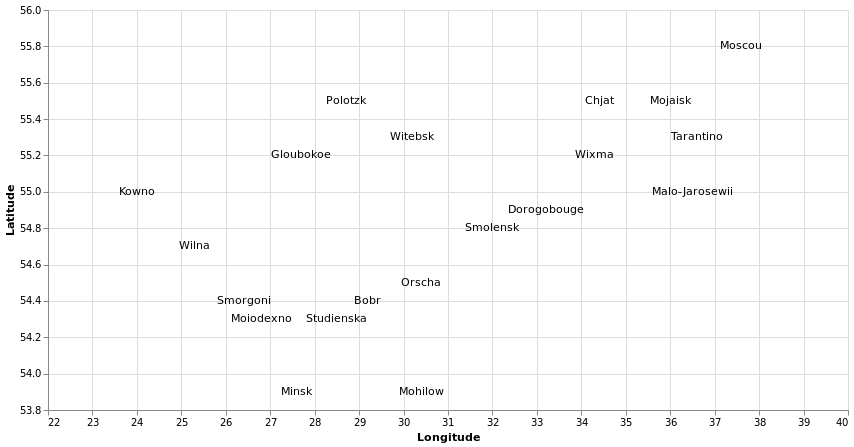

In [3]:
# criando gráfico das cidades
cities = alt.Chart(data=city, width=800, height=400).mark_point(size=8, filled=True, color='transparent').encode(
                   x = alt.X('Long', scale={'domain':(23, 39)}, title='Longitude'),
                   y = alt.Y('Lat', scale={'domain':(53.8, 56)}, title= 'Latitude'),
                   text= alt.Text('City')
)     +     alt.Chart(data=city, width=800, height=400).mark_text().encode(
                   x = alt.X('Long', scale={'domain':(23, 39)}, title='Longitude'),
                   y = alt.Y('Lat', scale={'domain':(53.8, 56)}, title='Latitude'),
                   text= alt.Text('City')
                    ) 

cities

### Tropas

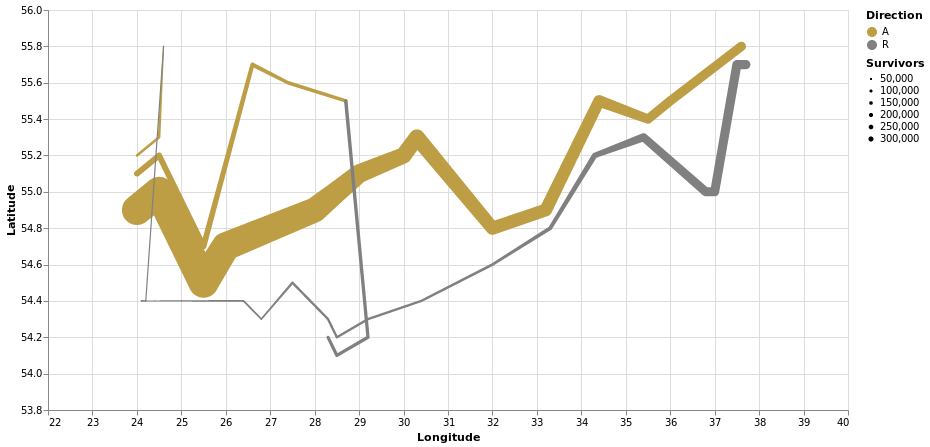

In [5]:
troops = alt.Chart(data=trp, width=800, height=400).mark_trail(point=True, clip=True).encode(
                   x = alt.X('Long', scale={'domain':(23, 39)}, title='Longitude'),
                   y = alt.Y('Lat', scale={'domain':(53.8, 56)}, title='Latitude'),
                   size = alt.Size('Survivors', scale={'range':[1,30], 'zero':False}),
                   color= alt.Color('Direction', scale={'range':['#bd9e45','gray']}),
                   detail= alt.Detail(field='Group', type='quantitative'),
                   order= alt.Order(field='row',type= 'quantitative'),
)

troops

### Temperatura

In [6]:
temp.head()

,Long,Temp,Days,Date
0,37.6,0,6,Oct18
1,36.0,0,6,Oct24
2,33.2,-9,16,Nov09
3,32.0,-21,5,Nov14
4,29.2,-11,10,NaN


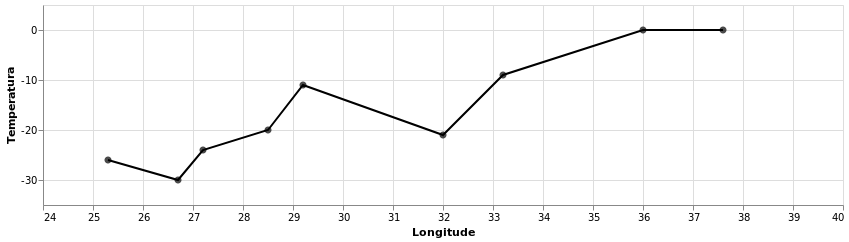

In [7]:
temperature = alt.Chart(data=temp, width=800, height=200).mark_text(align='center', baseline='bottom', dy=-10, dx=-8,
                                                                    size=10, color='black').encode(
                   y = alt.Y('Temp', scale={'domain':(-35, 1)}, title='Temperatura'),
                   x = alt.X('Long', scale={'domain':(24, 39)}, title='Longitude'),
                   text= alt.Text('Date')
).transform_filter('datum.date != null') + alt.Chart(data=temp, width=800, height=200).mark_point(color='black', filled=True, size=50).encode(
                   y = alt.Y('Temp', scale={'domain':(-35, 1)}, title='Temperatura'),
                   x = alt.X('Long', scale={'domain':(24, 39)}, title='Longitude'),
) + alt.Chart(data=temp, width=800, height=200).mark_line(color='black').encode(
                   y = alt.Y('Temp', scale={'domain':(-35, 1)}, title='Temperatura'),
                   x = alt.X('Long', scale={'domain':(24, 39)}, title='Longitude'),
                   text= alt.Text('Date') 
)

temperature

### Juntando tudo...

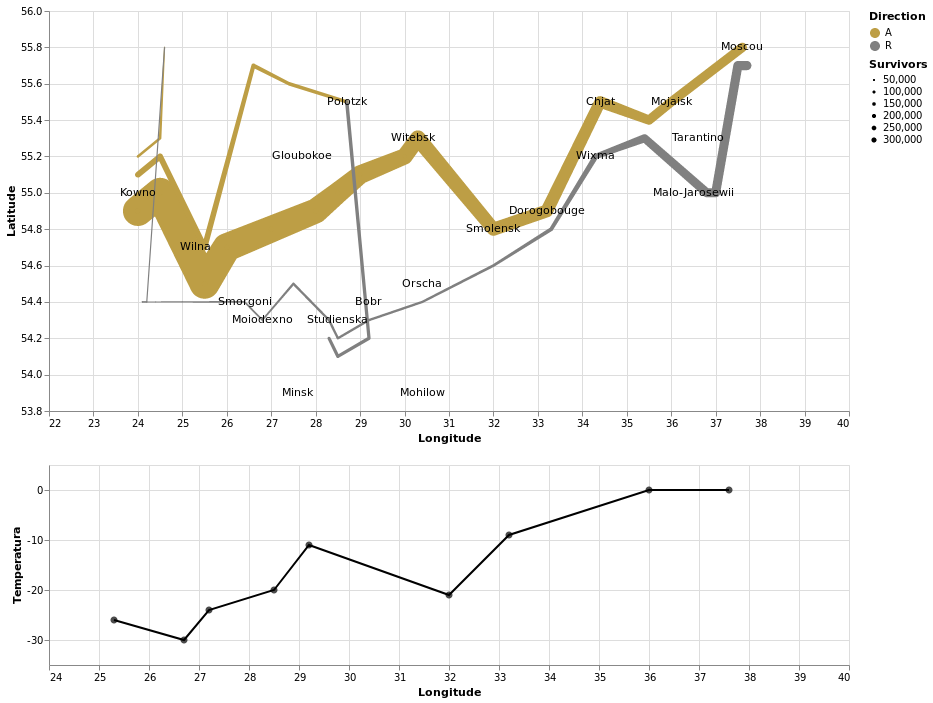

In [8]:
chart = alt.vconcat(troops+cities, temperature)
chart.background='white'

chart

**Fim!**